In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [284]:
dataset = pd.read_csv('./dataset/appdata10.csv')

In [285]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [286]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype('int')

In [287]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [288]:
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date','first_open', 'enrolled'])

In [289]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

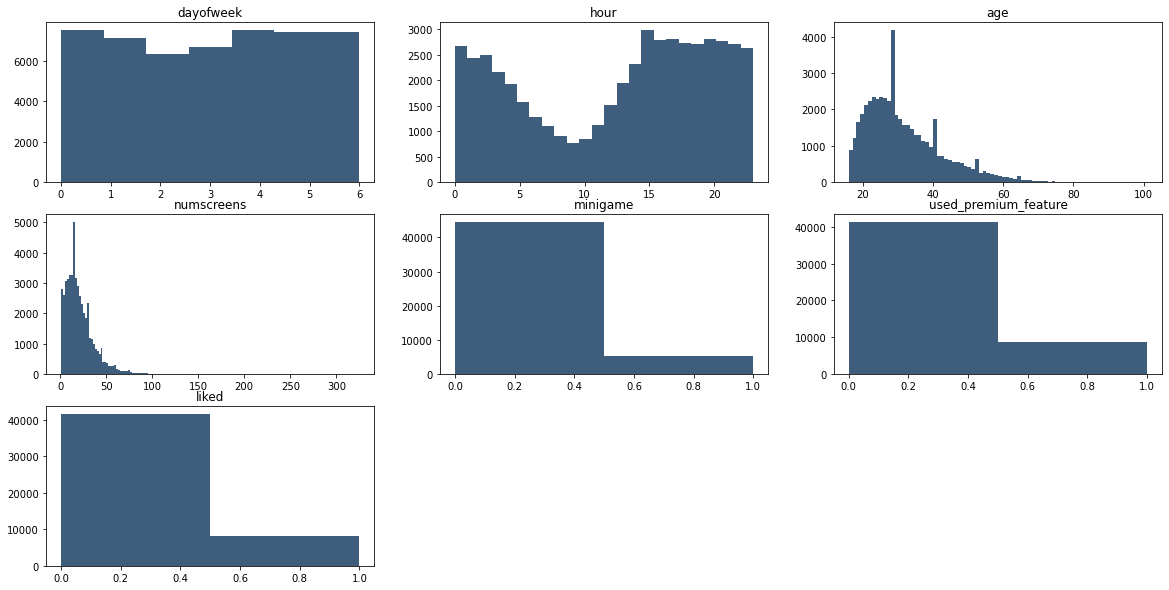

In [290]:
#Visualization the data to see the distribution
plt.suptitle("Histogram of numerical data", fontsize = 20)
plt.figure(figsize=(20,10))
length = dataset2.shape[1]+1
for i in range(1, length):
    plt.subplot(3,3,i)
#gca mean grab current axis :))))
    f = plt.gca()
    f.set_title(dataset2.columns.values[i -1])
    vals = np.size(dataset2.iloc[:,i- 1].unique())
    plt.hist(dataset2.iloc[:,i-1], bins = vals, color = '#3F5D7D')

In [291]:
corrwith_index = dataset2.corrwith(dataset.enrolled)

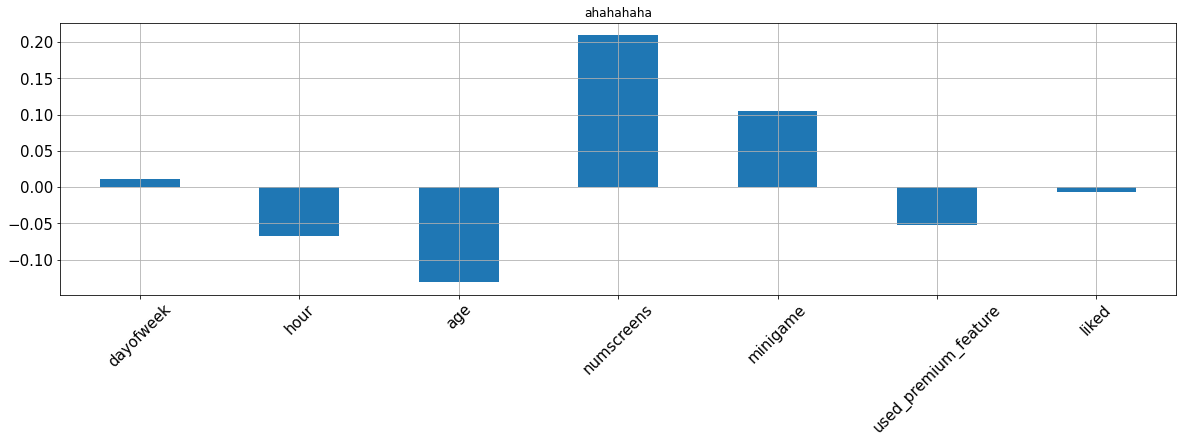

In [292]:
corrwith_index.plot.bar(figsize=(20,5), title = "ahahahaha", fontsize = 15, rot = 45,
                        grid = True)

In [293]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [294]:
corr = dataset2.corr()
print(corr)

                      dayofweek      hour       age  numscreens  minigame  \
dayofweek              1.000000  0.013249 -0.012326    0.007925 -0.008631   
hour                   0.013249  1.000000  0.018859   -0.076756 -0.009120   
age                   -0.012326  0.018859  1.000000   -0.128739  0.019745   
numscreens             0.007925 -0.076756 -0.128739    1.000000  0.041154   
minigame              -0.008631 -0.009120  0.019745    0.041154  1.000000   
used_premium_feature   0.001439  0.022553  0.004301    0.061972  0.108780   
liked                 -0.005737 -0.001725 -0.002593   -0.007349 -0.012250   

                      used_premium_feature     liked  
dayofweek                         0.001439 -0.005737  
hour                              0.022553 -0.001725  
age                               0.004301 -0.002593  
numscreens                        0.061972 -0.007349  
minigame                          0.108780 -0.012250  
used_premium_feature              1.000000  0.001690 

In [295]:
np.zeros_like(corr)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [296]:
mask = np.zeros_like(corr, dtype=np.bool)

In [297]:
mask

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [298]:
mask[np.triu_indices_from(mask)] = True 

In [299]:
mask[np.triu_indices_from(mask)]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

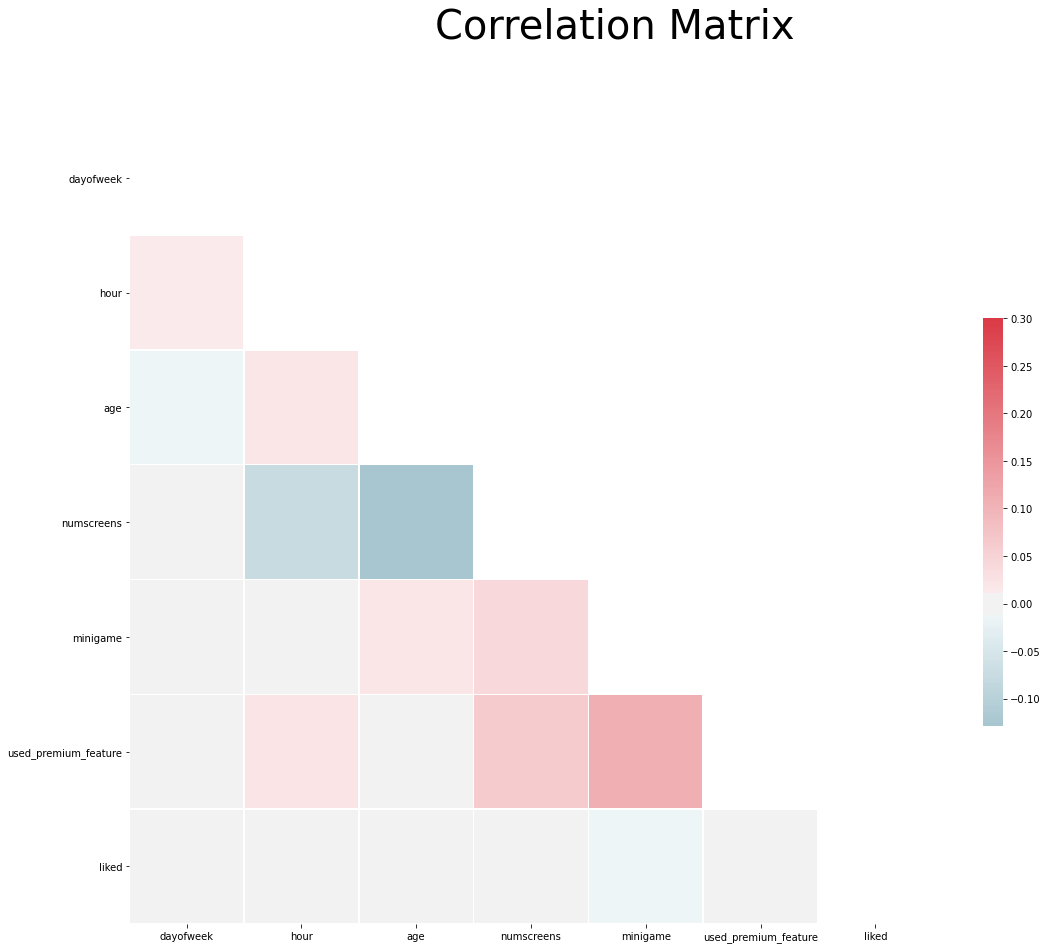

In [300]:

# Generate a mask for the upper triangle 
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [301]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [302]:
np.triu_indices_from(a, k = -1)

(array([0, 0, 0, 1, 1, 1, 2, 2]), array([0, 1, 2, 0, 1, 2, 1, 2]))

In [303]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [304]:
np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9],
       [0, 0, 0]])

In [305]:
# Parser module convert string of time  into needed format for time 
from dateutil import parser


In [306]:
dataset["enrolled_date"]

0                            NaN
1                            NaN
2                            NaN
3        2013-07-05 16:11:49.513
4        2013-02-26 18:56:37.841
                  ...           
49995    2013-05-09 13:47:52.875
49996                        NaN
49997                        NaN
49998    2013-04-28 12:35:38.709
49999                        NaN
Name: enrolled_date, Length: 50000, dtype: object

In [307]:
dataset["first_open"] 

0        2012-12-27 02:14:51.273
1        2012-12-02 01:16:00.905
2        2013-03-19 19:19:09.157
3        2013-07-05 16:08:46.354
4        2013-02-26 18:50:48.661
                  ...           
49995    2013-05-09 13:46:17.871
49996    2013-04-09 00:05:17.823
49997    2013-02-20 22:41:51.165
49998    2013-04-28 12:33:04.288
49999    2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: object

In [308]:
[parser.parse(row_date) for row_date in dataset["first_open"]]

[datetime.datetime(2012, 12, 27, 2, 14, 51, 273000),
 datetime.datetime(2012, 12, 2, 1, 16, 0, 905000),
 datetime.datetime(2013, 3, 19, 19, 19, 9, 157000),
 datetime.datetime(2013, 7, 5, 16, 8, 46, 354000),
 datetime.datetime(2013, 2, 26, 18, 50, 48, 661000),
 datetime.datetime(2013, 4, 3, 9, 58, 15, 752000),
 datetime.datetime(2012, 12, 25, 2, 33, 18, 461000),
 datetime.datetime(2012, 12, 11, 3, 7, 49, 875000),
 datetime.datetime(2013, 3, 20, 14, 22, 1, 569000),
 datetime.datetime(2013, 4, 26, 18, 22, 16, 13000),
 datetime.datetime(2013, 5, 14, 4, 48, 27, 597000),
 datetime.datetime(2013, 5, 28, 11, 7, 7, 358000),
 datetime.datetime(2012, 12, 17, 6, 28, 45, 903000),
 datetime.datetime(2013, 5, 25, 19, 52, 31, 798000),
 datetime.datetime(2013, 2, 18, 4, 48, 48, 912000),
 datetime.datetime(2013, 2, 2, 18, 41, 35, 724000),
 datetime.datetime(2013, 7, 7, 16, 7, 35, 57000),
 datetime.datetime(2013, 2, 2, 21, 12, 46, 888000),
 datetime.datetime(2013, 5, 10, 5, 59, 43, 405000),
 datetime.dat

In [309]:
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["first_open"]


0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

In [310]:
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [311]:
dataset.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [312]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
dataset["difference"].describe()


count    31074.000000
mean       190.791659
std        621.887155
min          0.000000
25%          0.000000
50%          0.000000
75%         16.000000
max       5434.000000
Name: difference, dtype: float64

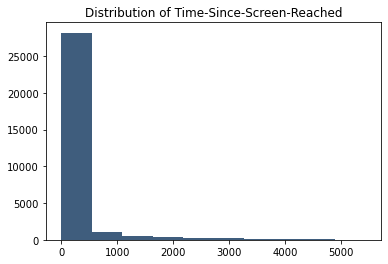

In [313]:
response_hist = plt.hist(dataset["difference"].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Screen-Reached')
plt.show()

In [314]:

dataset.loc[dataset.difference > 48, 'enrolled'] = 0


In [315]:
dataset['enrolled'].describe()

count    50000.000000
mean         0.497000
std          0.499996
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: enrolled, dtype: float64

In [316]:
dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])

In [317]:
dataset.dtypes

user                     int64
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
liked                    int64
dtype: object

In [318]:
top_screens = pd.read_csv('dataset/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [319]:
dataset["screen_list"] = dataset.screen_list.astype(str) + ','
dataset.head(10)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
5,56480,2,9,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,0
6,144649,1,2,35,"product_review,product_review2,ScanPreview,",3,0,0,0,0
7,249366,1,3,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,0
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,0
9,338013,4,18,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,0


In [320]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",", "")

dataset['Other'] = dataset.screen_list.str.count(",")


In [321]:
dataset.head(10)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
6,144649,1,2,35,"product_review,product_review2,ScanPreview,",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,249366,1,3,26,"Home,product_review,product_review2,ScanPrevie...",41,0,1,0,0,...,0,0,0,0,0,0,1,0,0,8
8,372004,2,14,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,0,0,...,0,0,0,0,1,0,0,0,0,19
9,338013,4,18,26,"Home,product_review,product_review,product_rev...",19,0,0,1,0,...,0,0,0,0,0,0,0,0,0,11


In [324]:
dataset = dataset.drop(columns=['screen_list'])

KeyError: "['screen_list'] not found in axis"

In [325]:
dataset.head(10)


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10
5,56480,2,9,20,14,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,6
6,144649,1,2,35,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,249366,1,3,26,41,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,8
8,372004,2,14,29,33,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,19
9,338013,4,18,26,19,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,11


In [326]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)



In [327]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)



In [328]:
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)



In [329]:
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)



In [331]:
#Final Dataset 
dataset.head()
dataset.describe()
dataset.columns

dataset.to_csv('new_appdata10.csv', index = False)

In [332]:
dataset.head()


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [246]:

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time
from datetime import datetime


In [337]:

#  Data Preprocessing - Tien Xu Ly 
dataset = pd.read_csv('new_appdata10.csv')
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [338]:
dataset['enrolled']

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

In [339]:
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [340]:



# Train-test split with ration 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    test_size = 0.2,
                                                    random_state = 0)




train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])








In [341]:
X_train.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
20330,2,20,32,5,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,1,21,22,42,1,0,0,1,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,0,4,26,85,1,0,0,0,1,0,...,0,0,0,0,0,10,0,2,1,2
34807,4,13,25,24,1,0,0,1,0,0,...,0,0,0,0,0,10,0,0,0,1
31888,3,16,50,11,0,0,0,1,0,1,...,0,0,0,0,0,3,0,2,0,0


In [347]:
# Feature Scaling using standard scaling, all values will be in between 0 and 1

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [355]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))



In [362]:
#Using Logistic regression for classification: L1 regulazation doesn't work on my notebook, then I have to use L2 penalty 
# instead
import sklearn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1, penalty = 'l2')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)




/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [364]:

# Indexes of accuracy: accuracy, precision, recall

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)


In [365]:
accuracy_score(y_test, y_pred)


0.7686

In [366]:
precision_score(y_test, y_pred) # tp / (tp + fp)


0.7632957292506044

In [367]:
recall_score(y_test, y_pred) # tp / (tp + fn)


0.7688717532467533

In [368]:
f1_score(y_test, y_pred)

0.7660735948241003

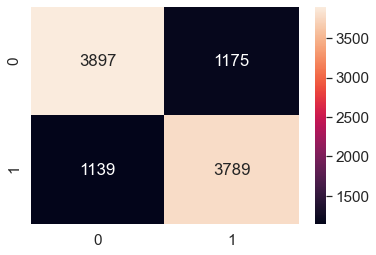

In [372]:
sns.heatmap(cm, annot = True, fmt='g')

In [375]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [425]:
# Imporove the Accuracy buy using cross validation

from sklearn.model_selection import cross_val_score, cross_val_predict
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.max())


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

0.7735


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [426]:
# The accuracy is 1 percent higher than previous result thanks to Cross Validation
test_identity.describe()


count     10000.000000
mean     186099.781600
std      107425.139591
min          23.000000
25%       92847.750000
50%      185770.500000
75%      278927.000000
max      373639.000000
Name: user, dtype: float64

In [427]:
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()

In [428]:
final_results['prediction'] = y_pred

In [429]:
final_results

,enrolled,user,prediction
11841,1,239786,1
19602,1,279644,1
45519,0,98290,0
25747,1,170150,1
42642,1,237568,1
...,...,...,...
25091,1,143036,0
27853,1,91158,1
47278,0,248318,0
37020,1,142418,1


In [447]:
# My question is : prediction after using cross validation is lower than without using corss validatiob??

In [440]:
 y_pred_cross = cross_val_predict(classifier, X_test, y = y_test)

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [444]:
corr_pred_cross = confusion_matrix(y_test, y_pred_cross)
corr_pred_cross

array([[3914, 1158],
       [1165, 3763]])

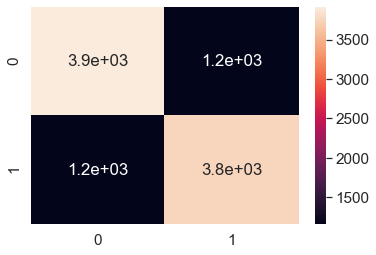

In [445]:
sns.heatmap(corr_pred_cross, annot = True)

In [446]:
accuracy_score(y_test, y_pred_cross)


0.7677